# **CLUSTERING (KMeans Clustering) - Income Dataset**

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [86]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [6]:
from google.colab import files
uploaded = files.upload()

Saving income.csv to income.csv


In [87]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


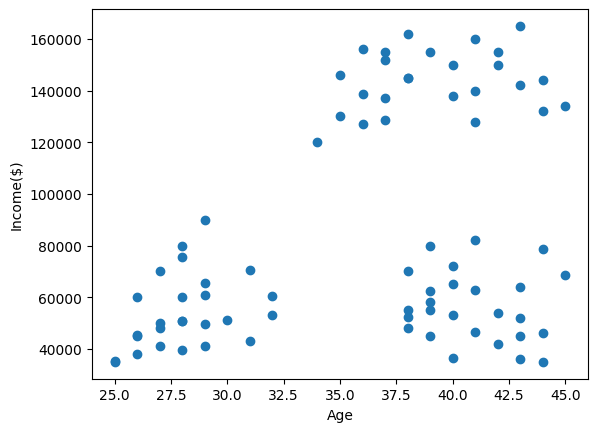

In [88]:
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df['Age'], df['Income($)'])

In [89]:
km = KMeans(n_clusters=3, random_state = 42)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1,
       1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0], dtype=int32)

In [90]:
df['cluster'] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
...,...,...,...,...
73,NaN,38,48000,0
74,NaN,43,36000,0
75,NaN,42,42000,0
76,NaN,40,36500,0


In [91]:
km.cluster_centers_

array([[3.42812500e+01, 4.61718750e+04],
       [3.91923077e+01, 1.43653846e+05],
       [3.48500000e+01, 6.99300000e+04]])

In [92]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

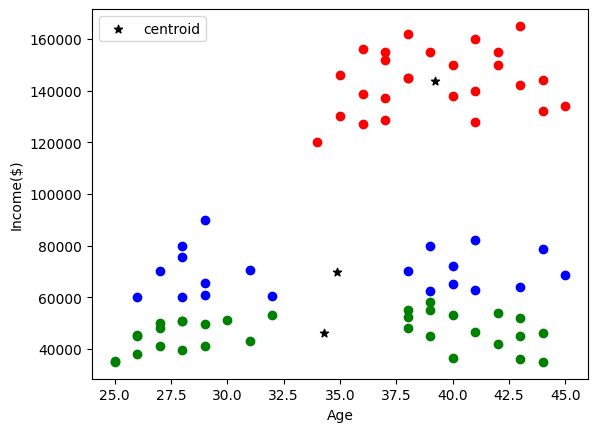

In [93]:
plt.xlabel('Age')
plt.ylabel('Income($)')

plt.scatter(df0['Age'], df0['Income($)'], color = 'green')
plt.scatter(df1['Age'], df1['Income($)'], color = 'red')
plt.scatter(df2['Age'], df2['Income($)'], color = 'blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker = '*', label = 'centroid')
plt.legend()

## After Using **MinMaxScaler()**

In [94]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.10,0.269231,2
1,Michael,0.20,0.423077,2
2,Mohan,0.20,0.200000,2
3,Ismail,0.15,0.192308,2
4,Kory,0.85,0.884615,1


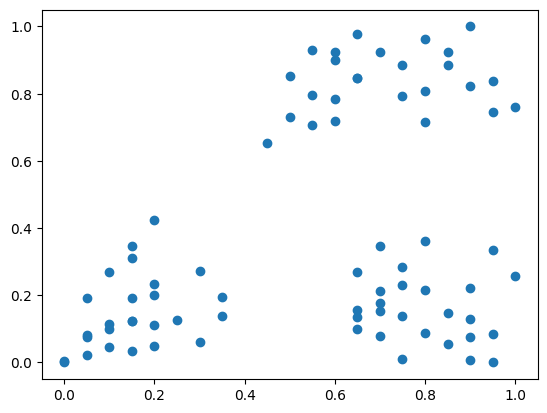

In [95]:
plt.scatter(df['Age'], df['Income($)'])

In [96]:
km = KMeans(n_clusters=3, random_state = 42)
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [97]:
df['cluster'] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,0.10,0.269231,2
1,Michael,0.20,0.423077,2
2,Mohan,0.20,0.200000,2
3,Ismail,0.15,0.192308,2
4,Kory,0.85,0.884615,1
...,...,...,...,...
73,NaN,0.65,0.100000,0
74,NaN,0.90,0.007692,0
75,NaN,0.85,0.053846,0
76,NaN,0.75,0.011538,0


In [98]:
km.cluster_centers_

array([[0.79423077, 0.16434911],
       [0.70961538, 0.83579882],
       [0.15576923, 0.14810651]])

In [99]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

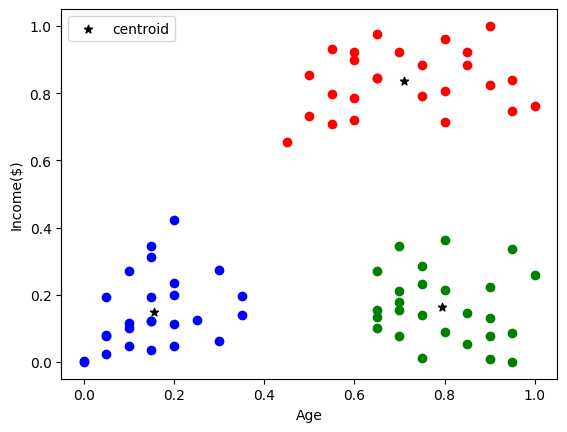

In [100]:
plt.xlabel('Age')
plt.ylabel('Income($)')

plt.scatter(df0['Age'], df0['Income($)'], color = 'green')
plt.scatter(df1['Age'], df1['Income($)'], color = 'red')
plt.scatter(df2['Age'], df2['Income($)'], color = 'blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker = '*', label = 'centroid')
plt.legend()

In [101]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters = k)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)

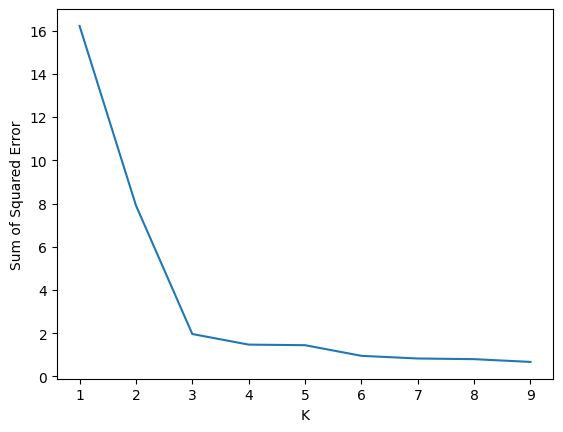

In [102]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)